In [36]:
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
from plotly.subplots import make_subplots
import plotly.graph_objects as go
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN
%matplotlib inline

In [37]:
path = r'heart_failure_clinical_records_dataset.csv'

In [38]:
df = pd.read_csv(path)

In [39]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [40]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [41]:
df.shape

(299, 13)

In [42]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [43]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [44]:
colors = ['#D8B5E6', '#7295DA']
labels = ['Normal','diabetes']
values = df['diabetes'].value_counts()/df['diabetes'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Diabetes",
    title_font_color="black",
    legend_title_font_color="yellow",
    paper_bgcolor="white",
    plot_bgcolor='black',
    font_color="black",
)
fig.show()

In [45]:
fig = px.pie(df, values='diabetes',names='DEATH_EVENT', title='Diabetes Death Event Ratio')
fig.show()

In [46]:
hist_data =[df["age"].values]
group_labels = ['age'] 

fig = ff.create_distplot(hist_data, group_labels, colors=['red'])
fig.update_layout(title_text='Age Distribution plot')

fig.show()

In [47]:
fig = px.box(df, x='sex', y='age', points='all')
fig.update_layout(
    title_text="Gender wise Age Spread - Male = 1 Female =0")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()


In [48]:
male = df[df["sex"]==1]
female = df[df["sex"]==0]

male_survi = male[df["DEATH_EVENT"]==0]
male_not = male[df["DEATH_EVENT"]==1]
female_survi = female[df["DEATH_EVENT"]==0]
female_not = female[df["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[df["DEATH_EVENT"]==0]),len(male[df["DEATH_EVENT"]==1]),
         len(female[df["DEATH_EVENT"]==0]),len(female[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Gender")
fig.show()

In [49]:
surv = df[df["DEATH_EVENT"]==0]["age"]
not_surv = df[df["DEATH_EVENT"]==1]["age"]
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5, colors=['blue', 'orange'])
fig.update_layout(
    title_text="Analysis in Age on Survival Status")
fig.show()

<AxesSubplot:>

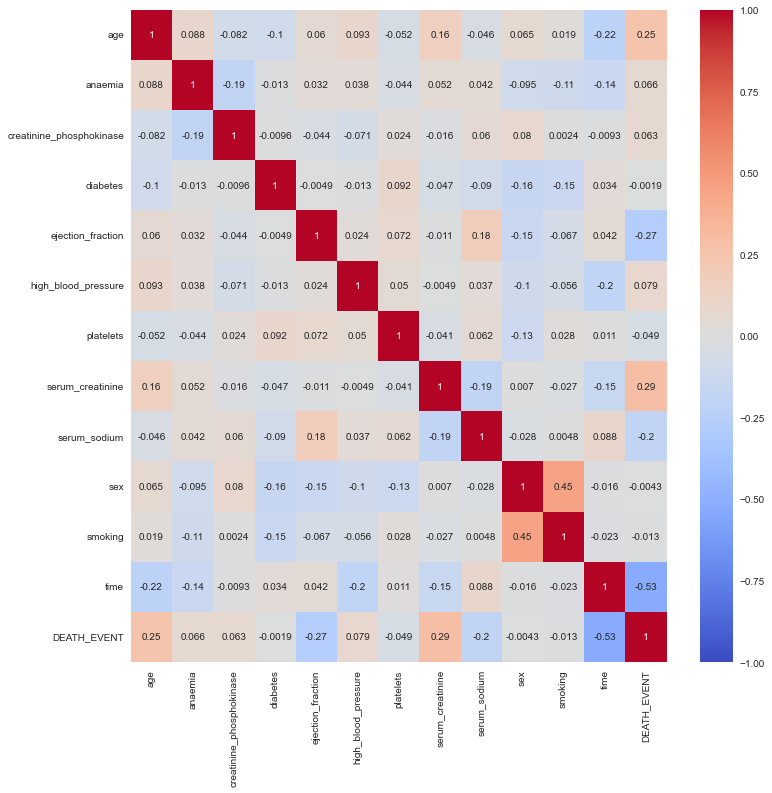

In [50]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True)

In [51]:
colors = ['red', 'blue']
labels = ['Male','Female']
values = df['sex'].value_counts()/df['sex'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Males Vs Female",
    title_font_color="black",
    legend_title_font_color="yellow",
    paper_bgcolor="white",
    plot_bgcolor='black',
    font_color="black",
)
fig.show()

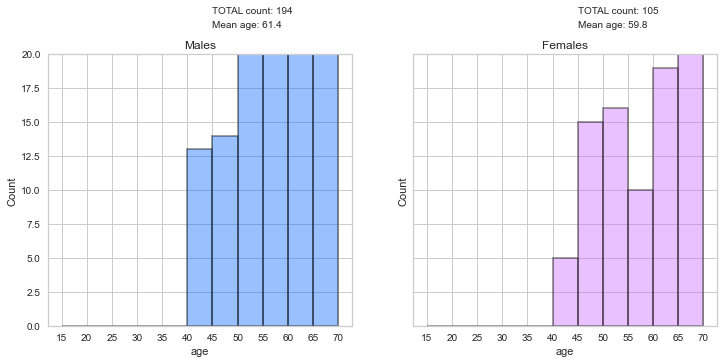

In [52]:
males_age = df[df['sex']==1]['age'] # subset with males age
females_age = df[df['sex']==0]['age'] # subset with females age

age_bins = range(15,75,5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=20)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))

# females histogram
sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

In [53]:
males_death = df[df['sex']==1]['DEATH_EVENT'] # subset with males income
females_death = df[df['sex']==0]['DEATH_EVENT'] # subset with females income


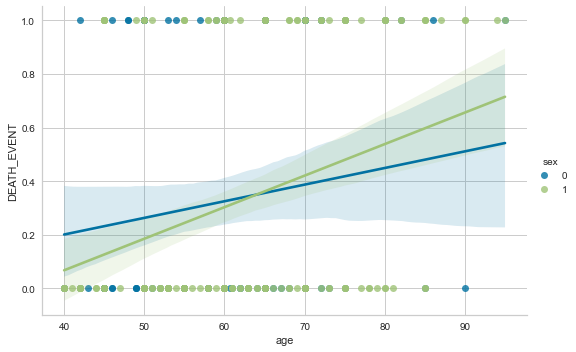

In [54]:
corr1, _ = pearsonr(males_age.values, males_death.values)
corr2, _ = pearsonr(females_age.values, females_death.values)

sns.lmplot('age', 'DEATH_EVENT', data=df, hue='sex',aspect=1.5)
plt.show()

In [55]:
x = df[['serum_sodium', 'ejection_fraction', 'age']]

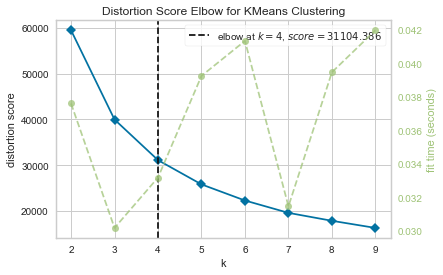

In [56]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(x)
visualizer.show()
plt.show()

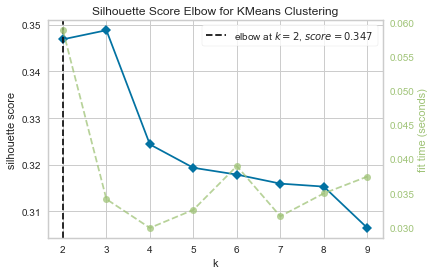

In [57]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(x)
visualizer.show()
plt.show()

In [58]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(x) # initialise and fit K-Means model

KM5_clustered = x.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_

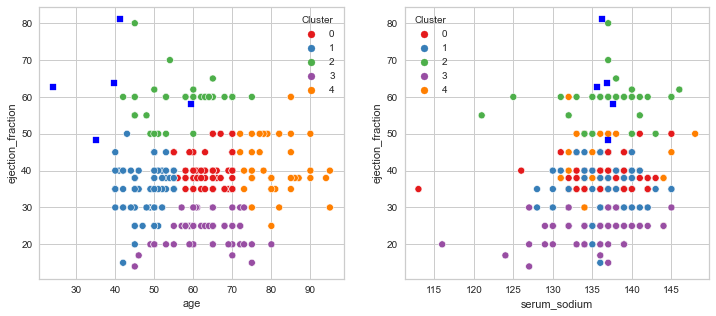

In [59]:
#age	anaemia	creatinine_phosphokinase	diabetes	ejection_fraction

fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('age', 'ejection_fraction', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('serum_sodium', 'ejection_fraction', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

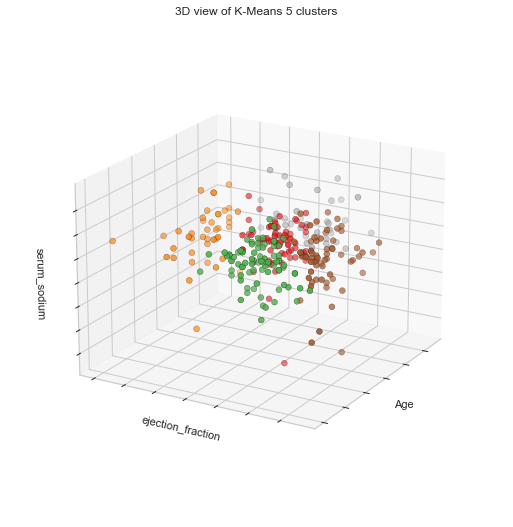

In [60]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(KM5_clustered['age'],
           KM5_clustered['ejection_fraction'],
           KM5_clustered['serum_sodium'],
           c=KM5_clustered['Cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('ejection_fraction')
ax.set_zlabel('serum_sodium')
ax.set_title('3D view of K-Means 5 clusters')
ax.dist = 12

plt.show()

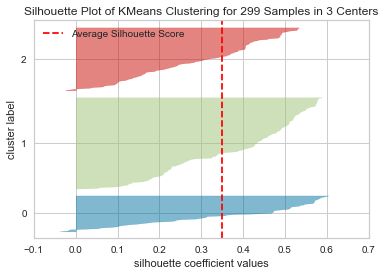

In [61]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=3, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(x)
visualizer.show()
plt.show()

In [62]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

In [63]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(x)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(x, DBS_clustering.labels_))

In [71]:
DBS_clustering = DBSCAN(eps=5, min_samples=4).fit(x)

DBSCAN_clustered = x.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [72]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,51
0,190
1,6
2,4
3,5
4,6
5,6
6,22
7,4


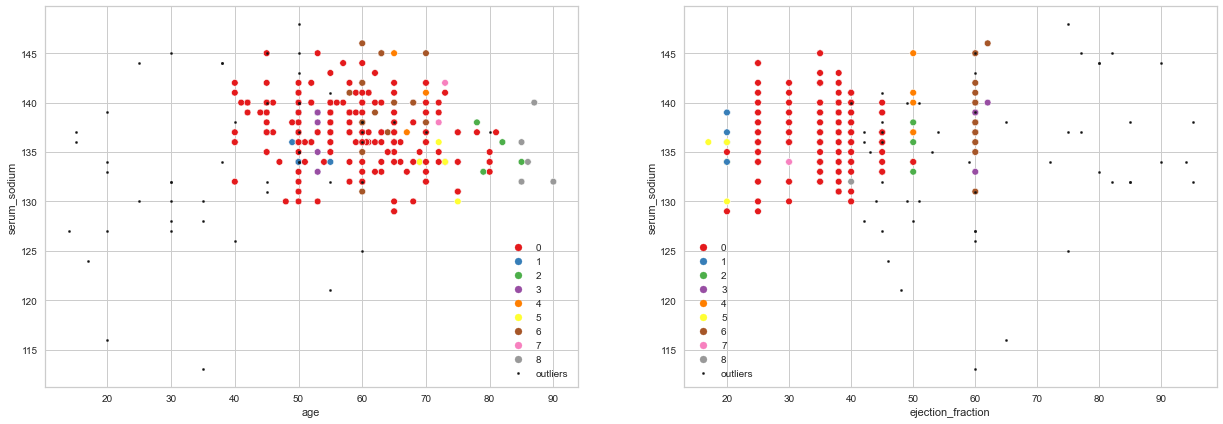

In [73]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(21,7))


sns.scatterplot('age', 'serum_sodium',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot('ejection_fraction', 'serum_sodium',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['ejection_fraction'], outliers['serum_sodium'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['age'], outliers['serum_sodium'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()


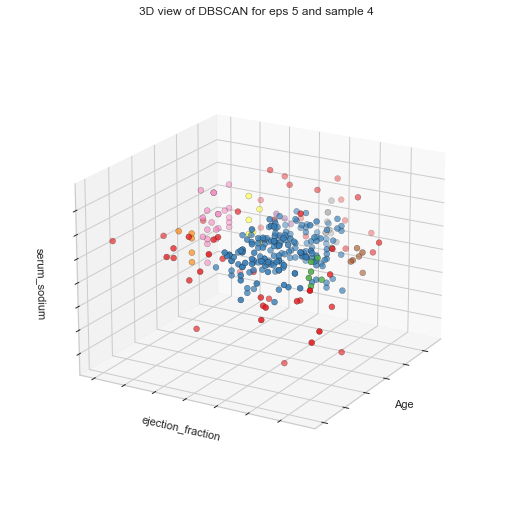

In [74]:
fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(DBSCAN_clustered['age'],
           DBSCAN_clustered['ejection_fraction'],
           DBSCAN_clustered['serum_sodium'],
           c=DBSCAN_clustered['Cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('ejection_fraction')
ax.set_zlabel('serum_sodium')
ax.set_title('3D view of DBSCAN for eps 5 and sample 4')
ax.dist = 12

plt.show()